# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [4]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [7]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [9]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

* 10 variables :Attribute Information:
* Tenemos las features de nuestros pacientes, mientras que en la target tenemos la variable cuantitativa de diabetes
* 442 registros

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [13]:
print(diabetes['data'].shape)
print(np.ndim(diabetes['data']))
diabetes['data']

(442, 10)
2


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [14]:
print(diabetes['target'].shape)
print(np.ndim(diabetes['target']))
diabetes['target']

(442,)
1


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## Buliding a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [15]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [16]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [18]:
X = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [20]:
y = pd.DataFrame(diabetes['target'], columns = ['target'])
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [21]:
df = X.join(y)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [22]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [24]:
df['sex'].unique()

array([ 0.05068012, -0.04464164])

<AxesSubplot:>

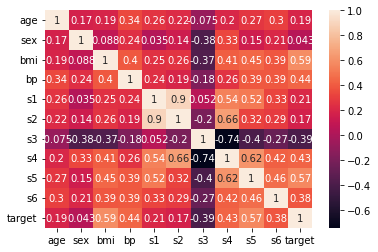

In [25]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [31]:
diabetes_data_train = X.tail(-20)
diabetes_target_train = y.tail(-20)
diabetes_data_test = X.tail(20)
diabetes_target_test = y.tail(20)

In [32]:
print(diabetes_data_train.shape)
print(diabetes_target_train.shape)
print(diabetes_data_test.shape)
print(diabetes_target_test.shape)

(422, 10)
(422, 1)
(20, 10)
(20, 1)


Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [33]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + bx1 + cx2...
7.43e+02 = 7.43*^10^2 = 743

In [35]:
diabetes_data_train.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [34]:
diabetes_model.coef_

array([[  14.64309255, -226.20372979,  534.85118506,  327.99386051,
        -798.29195232,  483.43521085,  106.19379993,  186.81390167,
         729.69979113,   65.90300959]])

In [36]:
diabetes_model.intercept_

array([152.16497127])

In [ ]:
y = 152.16 + w1x1 + w2*x2 + ...
y = 152.16 + 14.64*age - 226.2*sex ...

#### Print your `diabetes_target_test` and compare with the prediction. 

In [38]:
predictions = diabetes_model.predict(diabetes_data_test)
predictions

array([[198.63629305],
       [154.76585388],
       [172.27018806],
       [108.46372694],
       [163.32121798],
       [130.31150951],
       [260.08400235],
       [ 99.18765892],
       [114.64029028],
       [124.64542281],
       [217.4057991 ],
       [ 59.90582632],
       [131.705539  ],
       [119.00921792],
       [ 50.31960157],
       [194.4374675 ],
       [101.88414579],
       [123.68215223],
       [209.94981174],
       [ 50.63138164]])

In [39]:
diabetes_target_test

,target
422,233.0
423,91.0
424,111.0
425,152.0
426,120.0
427,67.0
428,310.0
429,94.0
430,183.0
431,66.0


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE', mean_absolute_error(diabetes_target_test, predictions))
print('MSE', mean_squared_error(diabetes_target_test, predictions))
print('RMSE', np.sqrt(mean_squared_error(diabetes_target_test, predictions)))

MAE 36.57509229548752
MSE 1994.3742492683887
RMSE 44.658417451454646


In [ ]:
Si tenemos 1 prediccion de 120 cuyo valor real es 100
MAE = 20
MSE = 400
RMSE 20

In [41]:
diabetes_model.score(diabetes_data_test,diabetes_target_test)

0.5871852206781831

#### Is `diabetes_target_test` exactly the same as the model prediction?

In [51]:
diabetes_target_test['target']

422    233.0
423     91.0
424    111.0
425    152.0
426    120.0
427     67.0
428    310.0
429     94.0
430    183.0
431     66.0
432    173.0
433     72.0
434     49.0
435     64.0
436     48.0
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, dtype: float64

In [52]:
df_predictions = pd.DataFrame(predictions, columns = ['predictions'])
df_predictions['real_value'] = diabetes_target_test['target'].values
df_predictions

,predictions,real_value
0,198.636293,233.0
1,154.765854,91.0
2,172.270188,111.0
3,108.463727,152.0
4,163.321218,120.0
5,130.311510,67.0
6,260.084002,310.0
7,99.187659,94.0
8,114.640290,183.0
9,124.645423,66.0


In [55]:
df_predictions['error'] = abs(df_predictions['predictions']-df_predictions['real_value'])
# df_predictions['error_cuadratico'] = abs(df_predictions['predictions']-df_predictions['real_value'])**2
df_predictions['error_cuadratico'] = df_predictions['error']**2
df_predictions

,predictions,real_value,error,error_cuadratico
0,198.636293,233.0,34.363707,1180.864355
1,154.765854,91.0,63.765854,4066.084121
2,172.270188,111.0,61.270188,3754.035946
3,108.463727,152.0,43.536273,1895.407072
4,163.321218,120.0,43.321218,1876.727927
5,130.311510,67.0,63.311510,4008.347236
6,260.084002,310.0,49.915998,2491.606822
7,99.187659,94.0,5.187659,26.911805
8,114.640290,183.0,68.359710,4673.049913
9,124.645423,66.0,58.645423,3439.285616


In [56]:
#MAE
np.mean(df_predictions['error'])

36.57509229548752

In [57]:
#MSE
np.mean(df_predictions['error_cuadratico'])

1994.3742492683887

In [58]:
#RMSE
np.sqrt(np.mean(df_predictions['error_cuadratico']))

44.658417451454646

#### Which are the most important features?

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(diabetes_data_train)

diabetes_data_train_scal = scaler.transform(diabetes_data_train)

diabetes_model = LinearRegression()
diabetes_model.fit(diabetes_data_train_scal, diabetes_target_train)

LinearRegression()

In [63]:
features = pd.DataFrame(abs(diabetes_model.coef_[0]), diabetes['feature_names'], columns = ['importance'])
features.sort_values(by=['importance'], ascending=False)

,importance
s1,38.045970
s5,34.796582
bmi,25.634051
s2,22.944855
bp,15.746934
sex,10.760587
s4,8.907661
s3,5.071219
s6,3.139896
age,0.690887
